<a href="https://colab.research.google.com/github/Daffa-afaf/Capstone-Bengkod/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Capstone_project_bengkod/ObesityDataSet.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
# Tampilkan konfirmasi
print(f"Dataset berhasil dimuat dari: {file_path}")

Dataset berhasil dimuat dari: /content/drive/MyDrive/Capstone_project_bengkod/ObesityDataSet.csv


# **EDA**

In [6]:
# Menampilkan ukuran dataset (jumlah baris dan kolom)
print(f"Ukuran Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")

Ukuran Dataset: 2111 baris x 17 kolom


In [7]:
# Menampilkan 5 data teratas
print("\n5 Data Teratas:")
display(df.head())


5 Data Teratas:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# Informasi tipe data
print("\nInformasi Tipe Data:")
display(df.info())


Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                       

None

In [9]:
# Statistik deskriptif
print("\nStatistik Deskriptif Data Numerikal:")
display(df.describe())


Statistik Deskriptif Data Numerikal:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [10]:
# Statistik deskriptif untuk data kategorikal
print("\nStatistik Deskriptif Data Kategorikal:")
display(df.describe(include=['object']))


Statistik Deskriptif Data Kategorikal:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


# Cek Missing Values

In [11]:
# Cek missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Jumlah Missing Values': missing_values,
    'Persentase (%)': missing_percent.round(2)
})

# Tampilkan hanya jika ada missing values
if missing_values.sum() > 0:
    print(missing_data[missing_data['Jumlah Missing Values'] > 0])
else:
    print("Tidak ada missing values dalam dataset!")

                                Jumlah Missing Values  Persentase (%)
Age                                                14            0.66
Gender                                              9            0.43
Height                                             12            0.57
Weight                                             11            0.52
CALC                                                5            0.24
FAVC                                               11            0.52
FCVC                                                8            0.38
NCP                                                12            0.57
SCC                                                10            0.47
SMOKE                                               5            0.24
CH2O                                                6            0.28
family_history_with_overweight                     13            0.62
FAF                                                 8            0.38
TUE                 

# Cek Duplikasi Data dan Nilai Unik

In [12]:
# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")
if duplicates > 0:
    print("Sampel data duplikat:")
    display(df[df.duplicated(keep='first')])

Jumlah data duplikat: 18
Sampel data duplikat:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
663,21,Female,1.52,42,Sometimes,yes,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
763,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
764,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
824,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I


In [13]:
# Menampilkan jumlah nilai unik untuk setiap kolom
unique_values = pd.DataFrame({
    'Jumlah Nilai Unik': df.nunique(),
    'Tipe Data': df.dtypes
})
print(unique_values)

                                Jumlah Nilai Unik Tipe Data
Age                                          1394    object
Gender                                          3    object
Height                                       1562    object
Weight                                       1518    object
CALC                                            5    object
FAVC                                            3    object
FCVC                                          808    object
NCP                                           637    object
SCC                                             3    object
SMOKE                                           3    object
CH2O                                         1263    object
family_history_with_overweight                  3    object
FAF                                          1186    object
TUE                                          1130    object
CAEC                                            5    object
MTRANS                                  

# Analisis Variabel Target

Distribusi Kelas Target:
                     Jumlah  Persentase (%)
NObeyesdad                                 
Insufficient_Weight     272           12.88
Normal_Weight           287           13.60
Obesity_Type_I          351           16.63
Obesity_Type_II         297           14.07
Obesity_Type_III        324           15.35
Overweight_Level_I      290           13.74
Overweight_Level_II     290           13.74


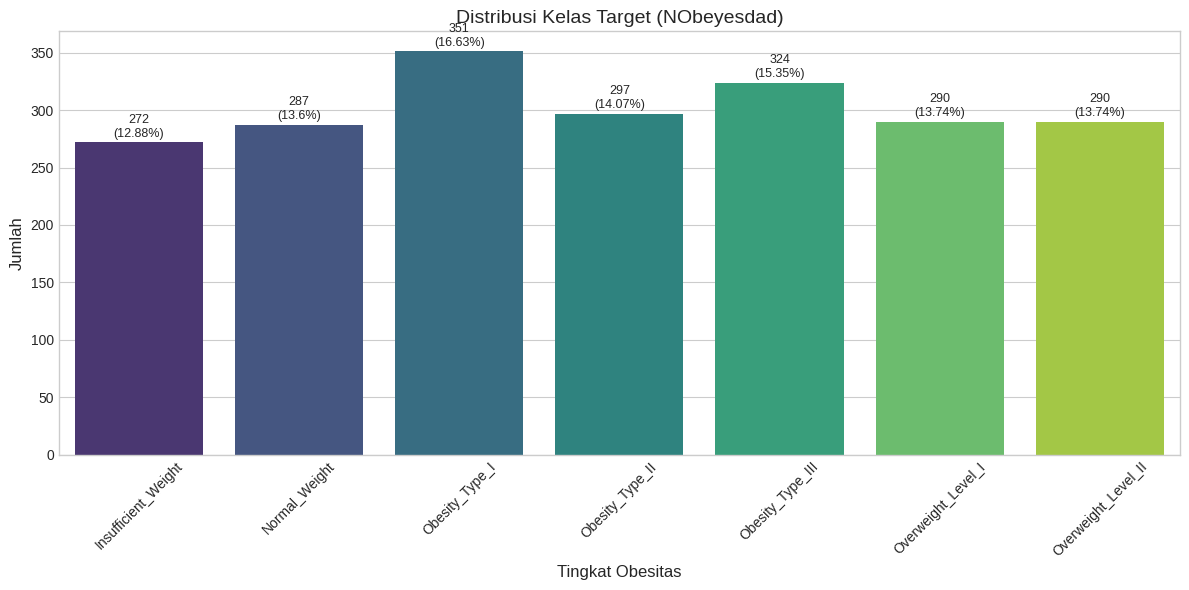

In [14]:
# Distribusi kelas target (NObeyesdad)
target_counts = df['NObeyesdad'].value_counts().sort_index()
target_percent = (target_counts / len(df) * 100).round(2)

# Tampilkan dalam tabel
target_stats = pd.DataFrame({
    'Jumlah': target_counts,
    'Persentase (%)': target_percent
})
print("Distribusi Kelas Target:")
print(target_stats)

# Visualisasi distribusi target yang lebih jelas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=14)
plt.xlabel('Tingkat Obesitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan label jumlah dan persentase pada setiap bar
for i, (count, percent) in enumerate(zip(target_counts, target_percent)):
    ax.text(i, count + 5, f'{count}\n({percent}%)', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Analisis Variabel Numerik

In [15]:
# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Kolom numerik: {numerical_cols}")

Kolom numerik: []


Analisis Nilai Unik pada Kolom yang Seharusnya Numerik:

Kolom: Age
Jumlah nilai unik: 1395
Contoh 10 nilai unik: ['21' '23' '27' '22' '29' '24' '26' '41' '30' '52']
Jumlah nilai yang tidak bisa dikonversi ke numerik (jika ada): 22

Kolom: Height
Jumlah nilai unik: 1563
Contoh 10 nilai unik: ['1.62' '1.52' '1.8' '1.78' '1.5' '1.64' '1.72' '1.85' '1.65' '1.77']
Jumlah nilai yang tidak bisa dikonversi ke numerik (jika ada): 22

Kolom: Weight
Jumlah nilai unik: 1519
Contoh 10 nilai unik: ['64' '56' '77' '87' '89.8' '53' '55' '348.49777557852735' '68' '105']
Jumlah nilai yang tidak bisa dikonversi ke numerik (jika ada): 19

Kolom: FCVC
Jumlah nilai unik: 809
Contoh 10 nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876']
Jumlah nilai yang tidak bisa dikonversi ke numerik (jika ada): 18

Kolom: NCP
Jumlah nilai unik: 638
Contoh 10 nilai unik: ['3' '1' '4' '10.84070601060834' nan '?' '11.23368726240087'
 '11.858467462996222' '3.28926' '3.99

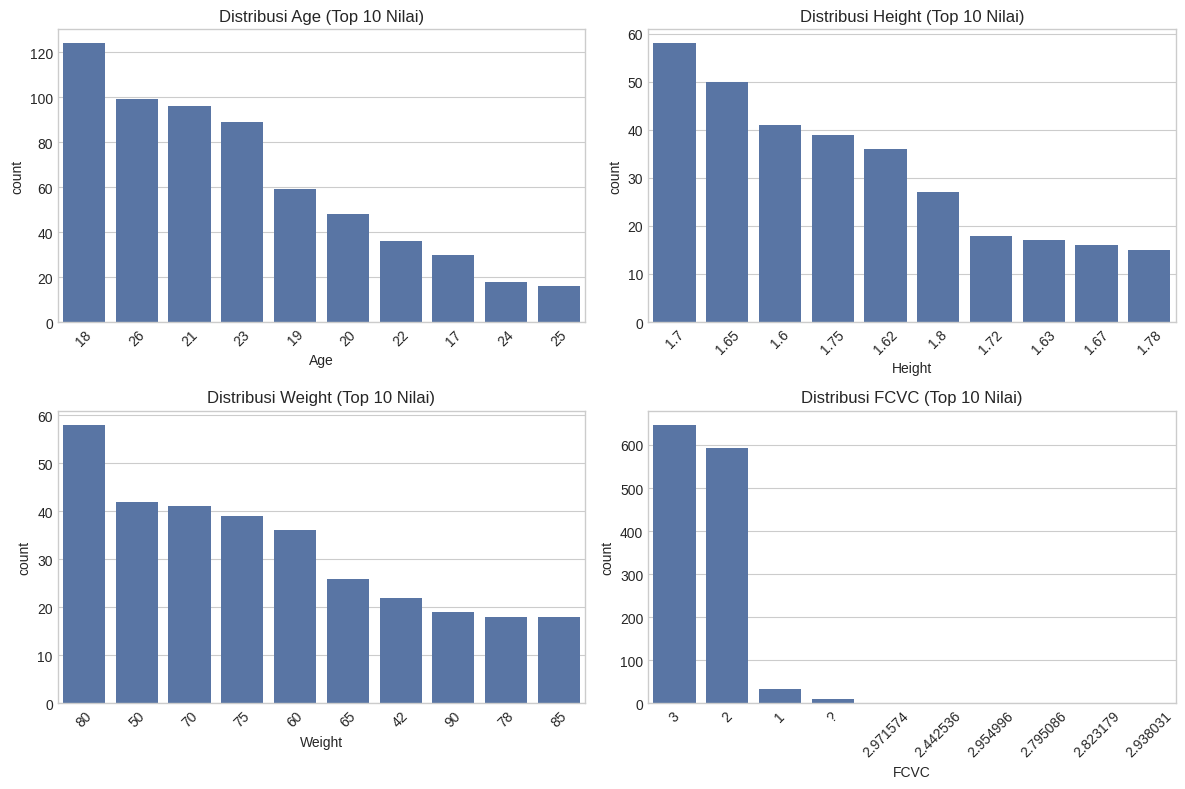

In [16]:
# Daftar kolom yang seharusnya numerik
potential_numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Tampilkan nilai unik untuk setiap kolom yang seharusnya numerik
print("Analisis Nilai Unik pada Kolom yang Seharusnya Numerik:")
for col in potential_numerical_cols:
    unique_values = df[col].unique()
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {len(unique_values)}")
    print(f"Contoh 10 nilai unik: {unique_values[:10]}")
    print(f"Jumlah nilai yang tidak bisa dikonversi ke numerik (jika ada): {sum(pd.to_numeric(df[col], errors='coerce').isna())}")

# Visualisasi distribusi data menggunakan countplot (karena tipe data object)
plt.figure(figsize=(12, 8))
for i, col in enumerate(potential_numerical_cols[:4]):  # Batasi 4 kolom untuk efisiensi
    plt.subplot(2, 2, i+1)
    # Gunakan countplot untuk melihat distribusi nilai (karena tipe data object)
    sns.countplot(x=df[col], order=df[col].value_counts().index[:10])  # Ambil 10 nilai teratas
    plt.title(f'Distribusi {col} (Top 10 Nilai)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis Variabel Kategorikal

In [17]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom kategorikal: {categorical_cols}")

Kolom kategorikal: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


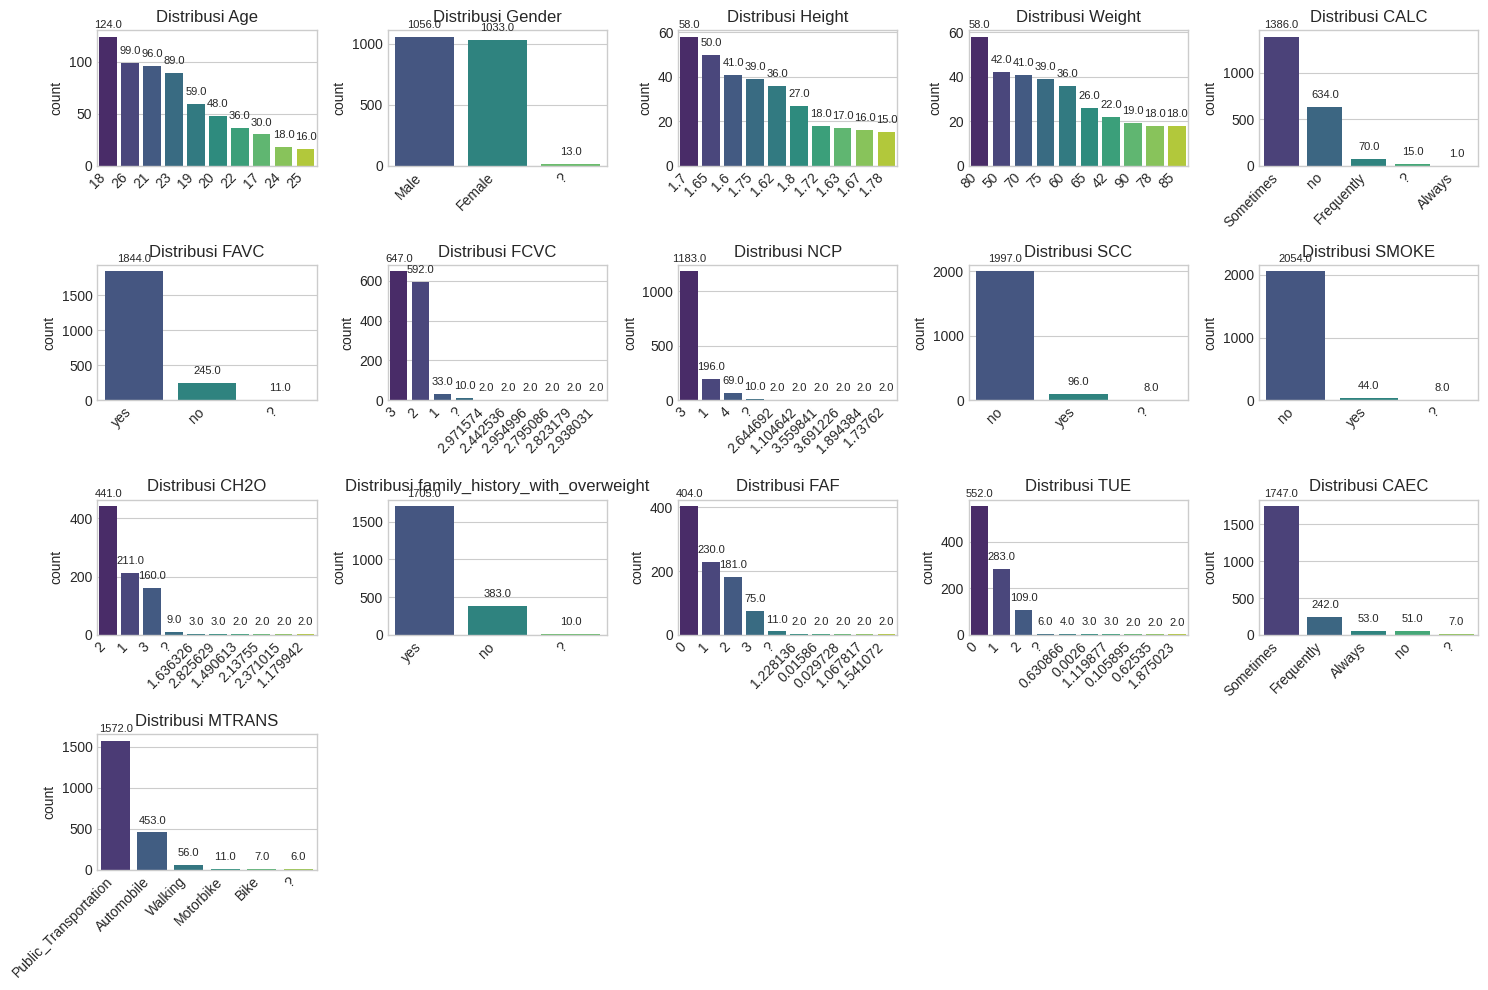

In [18]:
# Visualisasi untuk variabel kategorikal (batasi jumlah kategori untuk kejelasan)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 5, i)  # Grid 4x5 untuk menampung semua kolom (17 kolom)
    # Ambil 10 kategori teratas untuk menghindari plot yang terlalu padat
    value_counts = df[col].value_counts().head(10)
    ax = sns.countplot(x=col, data=df, order=value_counts.index, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45, ha='right')

    # Tambahkan label jumlah pada setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5), textcoords='offset points',
                    size=8)  # Ukuran teks lebih kecil untuk kejelasan

    plt.xlabel('')
    if i > 15:  # Batasi subplot agar tidak melebihi grid
        break

plt.tight_layout()
plt.show()

# Deteksi Outlier

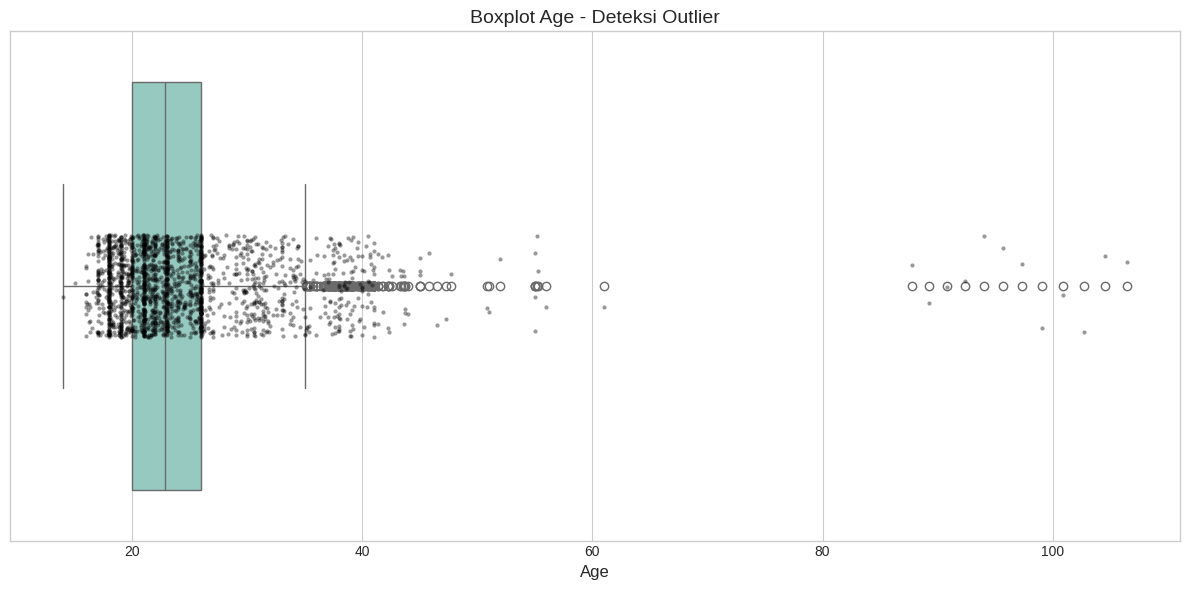

Outlier pada Age:
  Batas bawah: 10.89
  Batas atas: 35.07
  Jumlah outlier: 179
  Persentase outlier: 8.57%



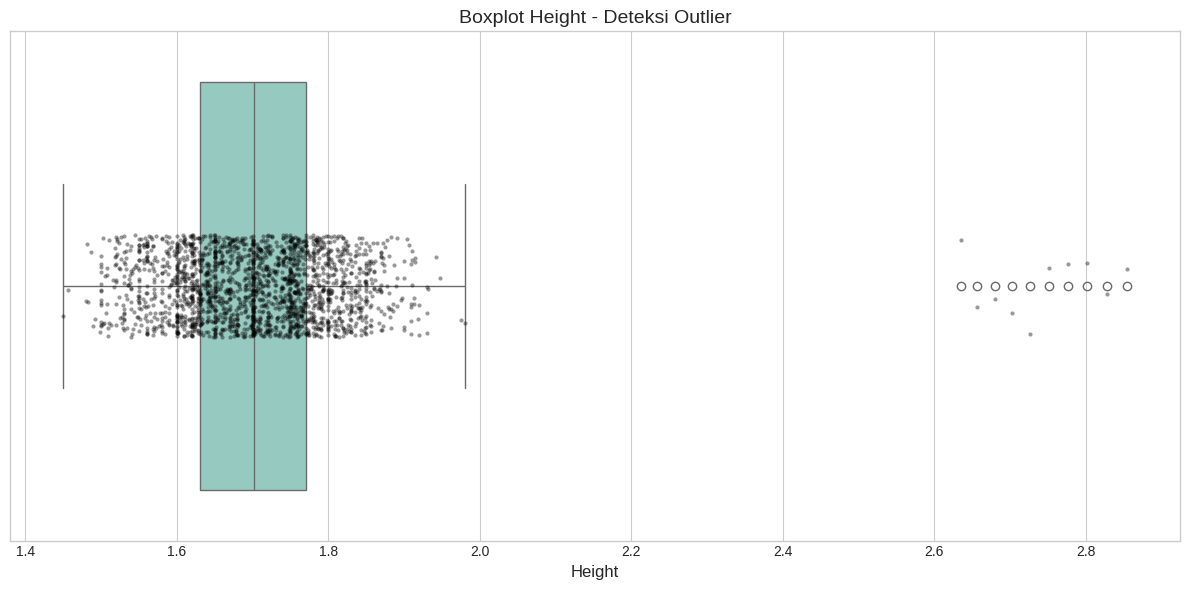

Outlier pada Height:
  Batas bawah: 1.42
  Batas atas: 1.98
  Jumlah outlier: 10
  Persentase outlier: 0.48%



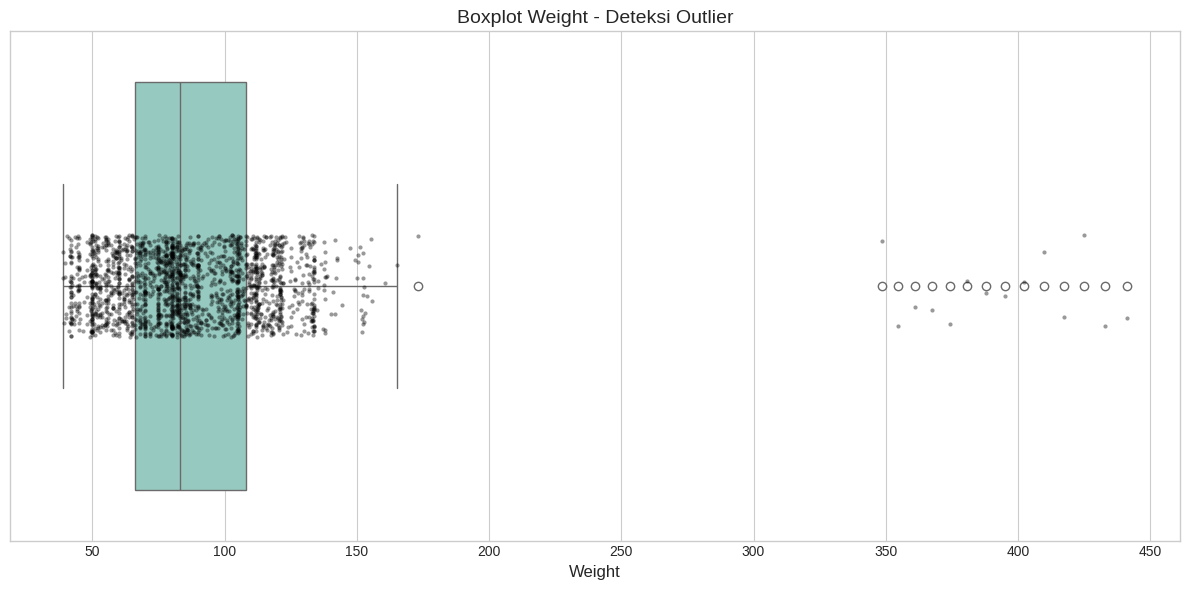

Outlier pada Weight:
  Batas bawah: 2.92
  Batas atas: 171.14
  Jumlah outlier: 15
  Persentase outlier: 0.72%



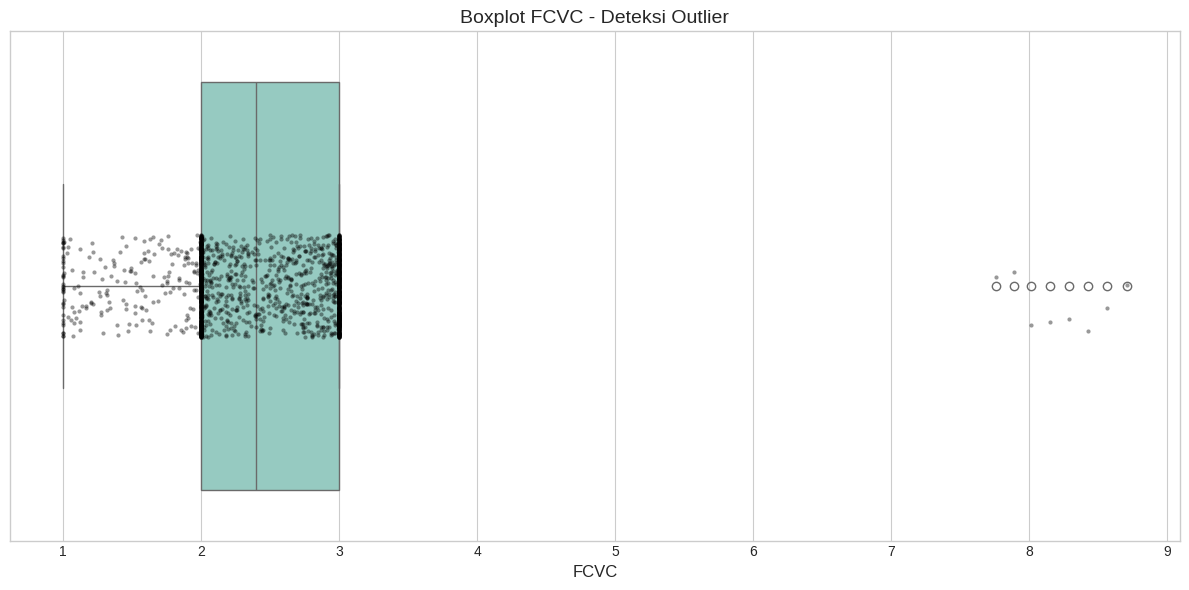

Outlier pada FCVC:
  Batas bawah: 0.50
  Batas atas: 4.50
  Jumlah outlier: 8
  Persentase outlier: 0.38%



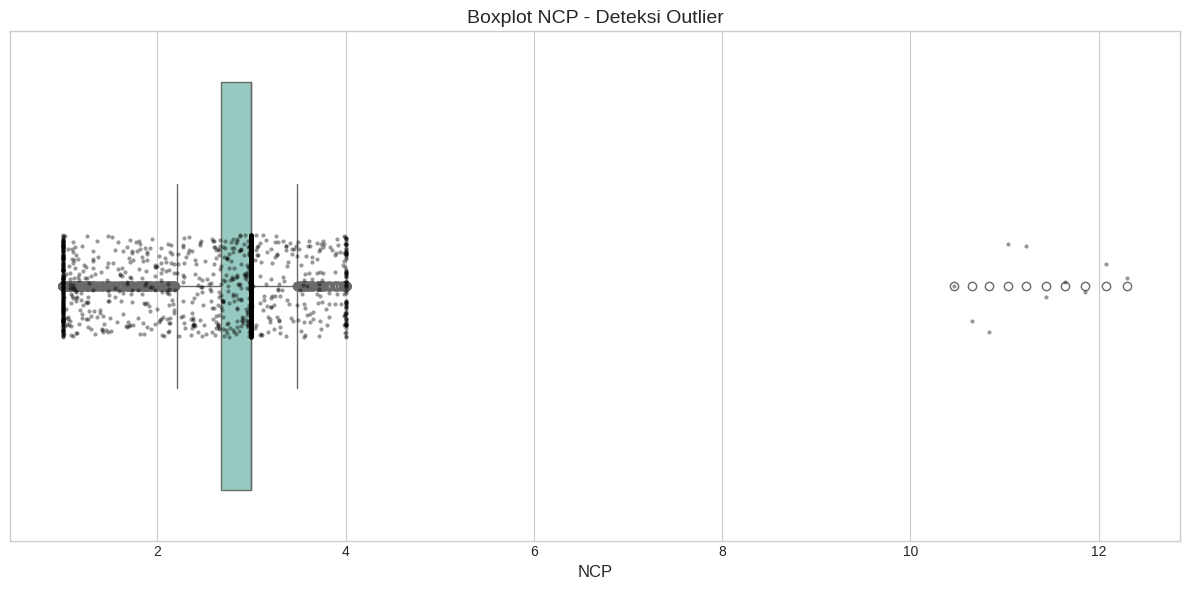

Outlier pada NCP:
  Batas bawah: 2.19
  Batas atas: 3.49
  Jumlah outlier: 592
  Persentase outlier: 28.34%



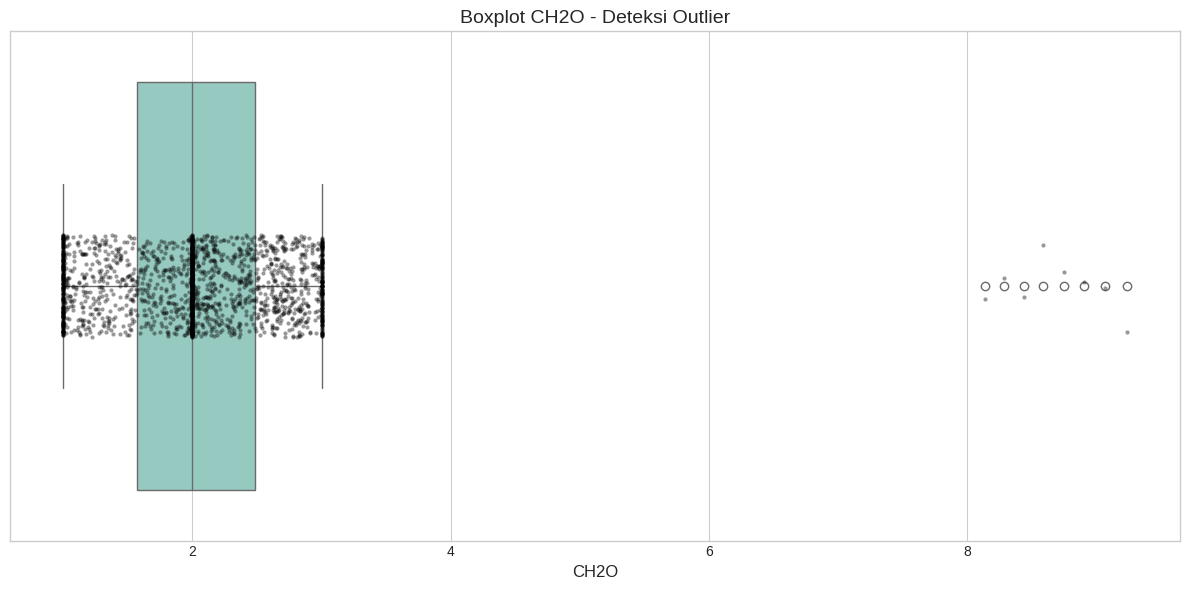

Outlier pada CH2O:
  Batas bawah: 0.20
  Batas atas: 3.85
  Jumlah outlier: 8
  Persentase outlier: 0.38%



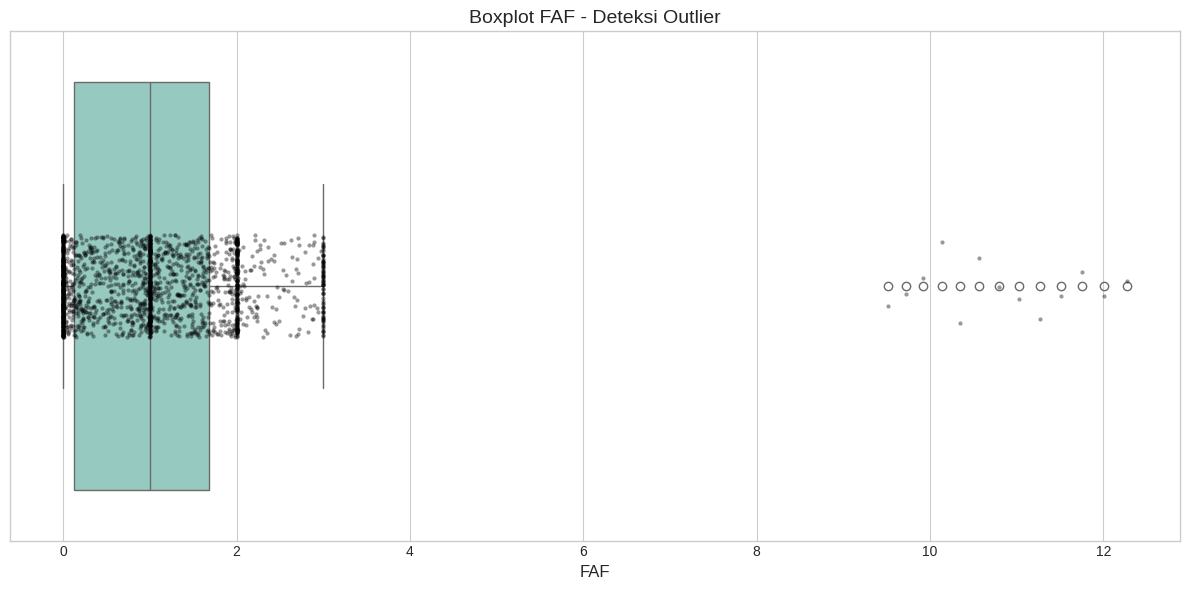

Outlier pada FAF:
  Batas bawah: -2.20
  Batas atas: 4.02
  Jumlah outlier: 13
  Persentase outlier: 0.62%



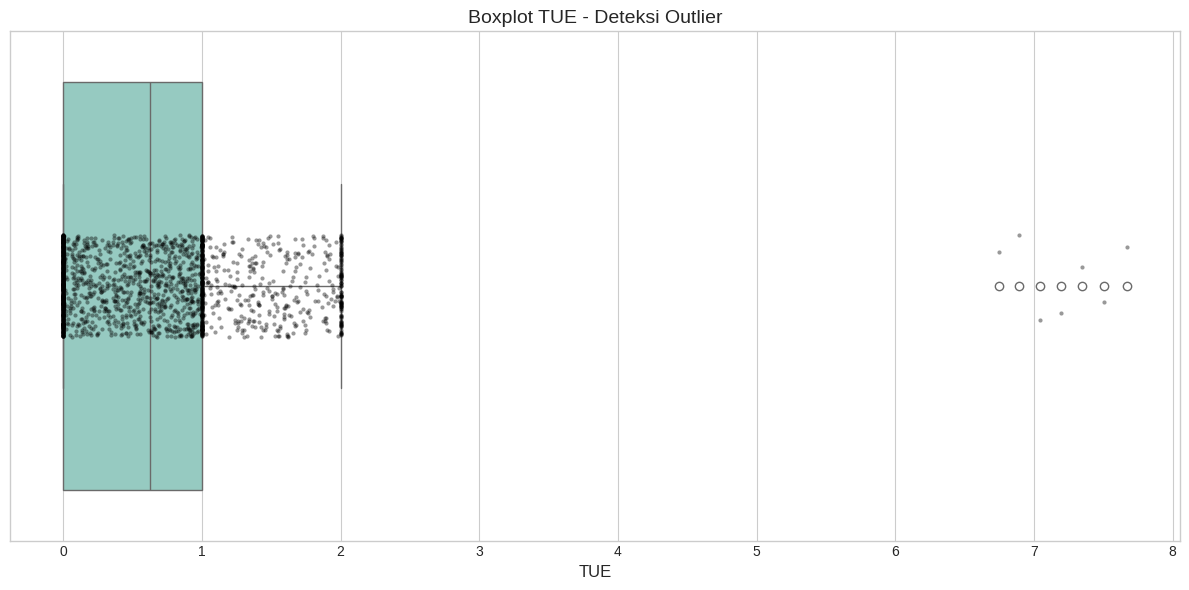

Outlier pada TUE:
  Batas bawah: -1.50
  Batas atas: 2.50
  Jumlah outlier: 7
  Persentase outlier: 0.33%



In [19]:
# Asumsikan important_numeric sudah didefinisikan (misalnya dari kolom yang seharusnya numerik)
important_numeric = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Visualisasi boxplot untuk variabel numerik penting
for col in important_numeric:
    if col in df.columns:
        # Coba konversi sementara ke numerik untuk pemeriksaan
        temp_series = pd.to_numeric(df[col], errors='coerce')

        # Periksa apakah ada nilai yang bisa dikonversi ke numerik
        if temp_series.notna().any():
            plt.figure(figsize=(12, 6))
            ax = sns.boxplot(x=temp_series, palette='Set3')
            plt.title(f'Boxplot {col} - Deteksi Outlier', fontsize=14)
            plt.xlabel(col, fontsize=12)

            # Tambahkan scatter points untuk melihat distribusi data
            sns.stripplot(x=temp_series, color='black', alpha=0.4, size=3)

            plt.tight_layout()
            plt.show()

            # Hitung dan tampilkan outlier
            Q1 = temp_series.quantile(0.25)
            Q3 = temp_series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = temp_series[(temp_series < lower_bound) | (temp_series > upper_bound)]
            print(f"Outlier pada {col}:")
            print(f"  Batas bawah: {lower_bound:.2f}")
            print(f"  Batas atas: {upper_bound:.2f}")
            print(f"  Jumlah outlier: {len(outliers.dropna())}")  # .dropna() untuk mengabaikan NaN
            print(f"  Persentase outlier: {(len(outliers.dropna())/len(temp_series.dropna()))*100:.2f}%")
            print()
        else:
            print(f"Kolom {col} tidak mengandung data numerik yang valid. Konversi ke numerik diperlukan pada preprocessing.")
            print()

# **Kesimpulan dari Explorasi Data Analisys**

Semua kolom saat ini bertipe object, yang menunjukkan bahwa tipe data numerik seperti Age, Height, dan Weight belum dikonversi ke format numerik (int64 atau float64), kemungkinan akibat adanya nilai non-numerik atau format yang tidak konsisten. Terdapat missing values pada hampir semua kolom, dengan jumlah yang relatif kecil (antara 5 hingga 14 baris per kolom). Persentase missing values berkisar antara 0.24% (CALC, SMOKE) hingga 0.66% (Age), yang menunjukkan bahwa data relatif lengkap secara keseluruhan. Ditemukan 18 baris duplikat, yang merupakan sekitar 0.85% dari total dataset. Hal ini menunjukkan adanya sedikit redundansi yang perlu diperhatikan. Kolom seperti Age (1394 nilai unik), Height (1562), dan Weight (1518) memiliki jumlah nilai unik yang sangat tinggi untuk tipe object, yang mengindikasikan bahwa data ini seharusnya numerik tetapi mungkin mengandung format desimal atau teks. Sebaliknya, kolom kategorikal seperti Gender (3 nilai unik) dan NObeyesdad (7 nilai unik) sesuai dengan sifat kategorikalnya. Semua kolom bertipe object, termasuk variabel yang seharusnya numerik seperti Age, Height, Weight, FCVC, NCP, CH2O, FAF, dan TUE. Hal ini dapat menghambat analisis statistik dan visualisasi lebih lanjut. Jumlah nilai unik yang sangat besar pada kolom numerik menunjukkan potensi adanya nilai ekstrem atau format data yang tidak standar (misalnya, desimal panjang seperti 348.847736 pada Weight). Meskipun persentase missing values kecil, distribusi missing values yang merata di seluruh kolom perlu ditangani untuk memastikan integritas data.

**Rekomendasi untuk Preprocessing**
1. Konversi Tipe Data: Konversikan kolom numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) ke float64
2. Penanganan Outlier
3. Penanganan Missing Values: Imputasi atau penghapusan baris dengan missing values (0.24% - 0.66%)
4. Penanganan Duplikat: Hapus 18 baris duplikat untuk memastikan data bersih.

# **Preprocessing Data**

In [20]:
# Menangani duplikasi
print(f"Jumlah duplikat sebelum dihapus: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah duplikat sebelum dihapus: 18
Jumlah duplikat setelah dihapus: 0


In [21]:
# Menangani missing values dan error (nilai non-numerik seperti '?' atau string acak)
# Daftar kolom yang seharusnya numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Fungsi untuk mengonversi kolom ke numerik dan menangani error
def convert_to_numeric(col):
    # Ganti '?' dan nilai non-numerik lainnya dengan NaN
    col = pd.to_numeric(col, errors='coerce')
    return col

# Terapkan konversi ke kolom numerik
for col in numeric_cols:
    df[col] = convert_to_numeric(df[col])
    # Imputasi missing values dengan median untuk kolom numerik
    df[col] = df[col].fillna(df[col].median())

# Kolom kategorikal: imputasi dengan modus
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verifikasi missing values setelah imputasi
print("Missing values setelah imputasi:")
print(df.isnull().sum())

Missing values setelah imputasi:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [22]:
# Menangani outlier menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip outlier ke batas bawah/atas
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numeric_cols:
    df = remove_outliers(df, col)

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Mengubah data kategorikal menjadi numerik
# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk decoding jika diperlukan

# Encode kolom target 'NObeyesdad'
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Evaluasi fitur menggunakan SelectKBest
X = df.drop('NObeyesdad', axis=1)  # Fitur
y = df['NObeyesdad']  # Target
selector = SelectKBest(score_func=f_classif, k='all')  # Pilih semua fitur untuk evaluasi
selector.fit(X, y)

# Skor fitur
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Skor fitur:")
print(feature_scores.sort_values(by='Score', ascending=False))

# Opsional: Pilih fitur dengan skor tertinggi (misalnya, top 10)
k_best = 10
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Fitur terpilih ({k_best}):", selected_features)

# Update dataframe dengan fitur terpilih
X = pd.DataFrame(X_selected, columns=selected_features)

Skor fitur:
                           Feature        Score
3                           Weight  1175.355659
1                           Gender   150.074373
11  family_history_with_overweight   129.889189
6                             FCVC    98.107781
0                              Age    92.056755
14                            CAEC    64.685809
5                             FAVC    36.267436
7                              NCP    35.822072
2                           Height    35.390855
15                          MTRANS    26.618417
4                             CALC    26.223209
8                              SCC    20.852413
12                             FAF    17.654741
10                            CH2O    14.643371
13                             TUE     8.035767
9                            SMOKE     4.650261
Fitur terpilih (10): ['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [25]:
from imblearn.over_sampling import SMOTE

# Mengatasi ketidakseimbangan kelas menggunakan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verifikasi distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts())

Distribusi kelas setelah SMOTE:
NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64


In [26]:
# Normalisasi/Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Gabungkan kembali fitur dan target ke dalam dataframe
df_preprocessed = pd.DataFrame(X_scaled, columns=selected_features)
df_preprocessed['NObeyesdad'] = y_balanced

# **Pemodelan**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# df_preprocessed berisi fitur terpilih dan target
X = df_preprocessed[['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'family_history_with_overweight', 'CAEC', 'MTRANS']]
y = df_preprocessed['NObeyesdad']

# Membagi data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

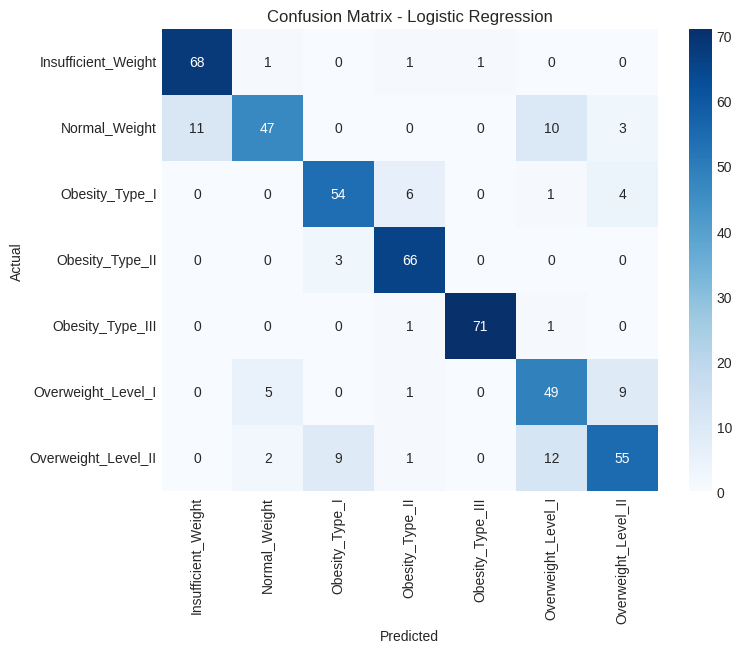

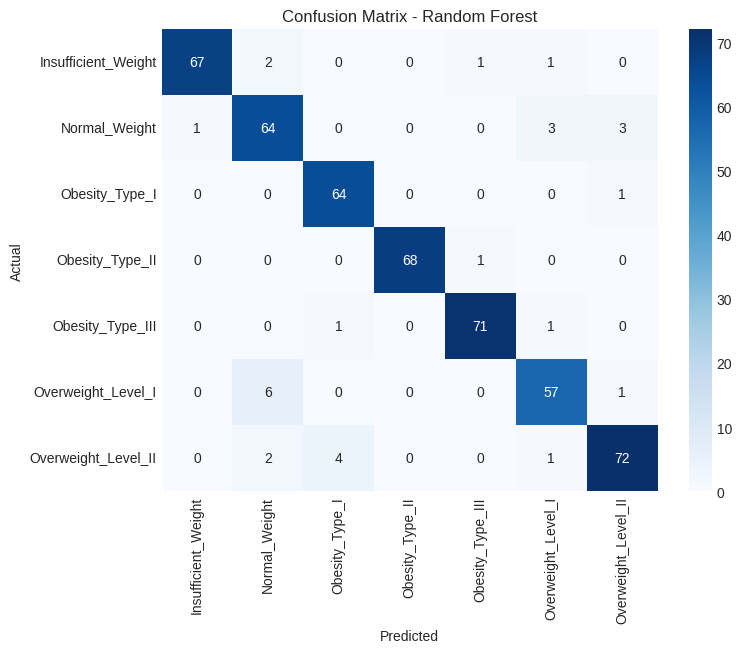

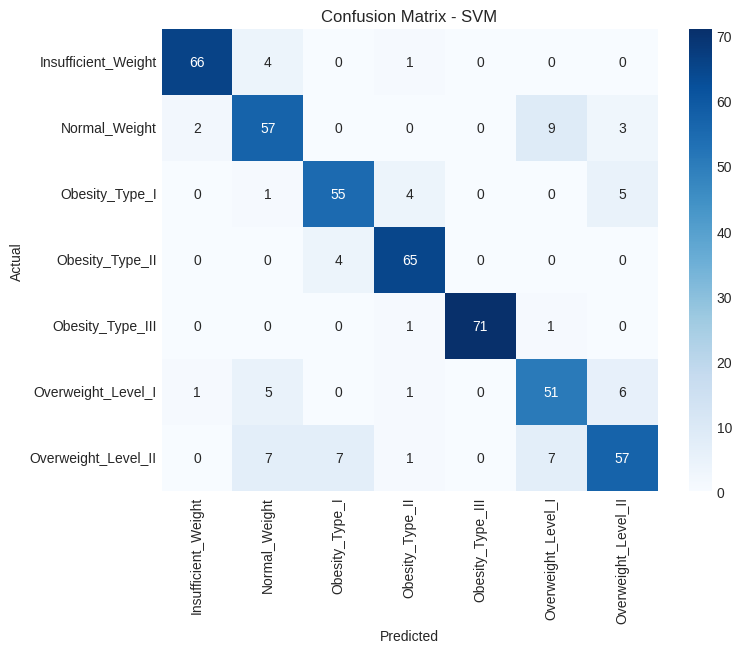

Hasil Evaluasi Model:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.833333   0.835430  0.833333  0.831193
1        Random Forest  0.941057   0.941923  0.941057  0.941219
2                  SVM  0.857724   0.859004  0.857724  0.857710


In [29]:
# Melatih dan mengevaluasi model
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Tampilkan hasil evaluasi
results_df = pd.DataFrame(results)
print("Hasil Evaluasi Model:")
print(results_df)

<Figure size 1000x700 with 0 Axes>

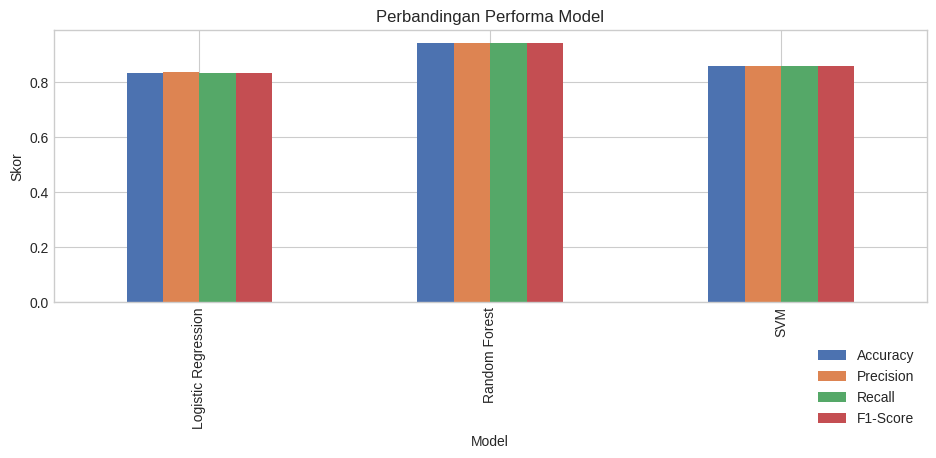

In [37]:
# Visualisasi perbandingan performa
plt.figure(figsize=(10, 7))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5), ncol=1)  # Posisi legenda di kanan bawah
plt.tight_layout(pad=3.0)  # Menambah padding untuk ruang lebih longgar
plt.show()

Pada tahap pemodelan dan evaluasi dataset obesitas, tiga algoritma klasifikasi digunakan: Logistic Regression, Random Forest, dan Support Vector Machine (SVM). Berdasarkan metrik evaluasi, Random Forest menunjukkan performa terbaik dengan akurasi 94.11%, presisi 94.19%, recall 94.11%, dan F1-score 94.12%, diikuti oleh SVM (akurasi 85.77%) dan Logistic Regression (akurasi 83.33%). Analisis confusion matrix memperkuat hasil ini, menunjukkan bahwa Random Forest memiliki jumlah kesalahan paling sedikit (29 prediksi salah) dibandingkan SVM (71) dan Logistic Regression (81). Random Forest sangat unggul dalam membedakan kelas yang berdekatan seperti Normal_Weight (90.14%), Overweight_Level_I (89.06%), dan Overweight_Level_II (91.14%), serta kelas obesitas seperti Obesity_Type_I (98.46%) dan Obesity_Type_II (98.55%). Sebaliknya, Logistic Regression dan SVM kesulitan membedakan kelas yang berdekatan, dengan Normal_Weight sering tertukar dengan Overweight_Level_I (10 dan 9 kasus) dan Overweight_Level_I/II sering tertukar satu sama lain (21 dan 13 kasus). Semua model menunjukkan performa baik pada kelas ekstrem seperti Insufficient_Weight dan Obesity_Type_III (>92%). Preprocessing yang dilakukan (penanganan missing values, encoding, SMOTE, dan scaling) telah mendukung performa model secara keseluruhan, terutama dengan data yang seimbang setelah SMOTE. Untuk langkah selanjutnya, disarankan untuk: (1) menggunakan Random Forest sebagai model utama dan melakukan hyperparameter tuning dengan GridSearchCV untuk meningkatkan performa lebih lanjut, (2) mengeksplorasi fitur tambahan atau feature engineering untuk membantu membedakan kelas yang berdekatan seperti Normal_Weight dan Overweight_Level, dan (3) menerapkan cross-validation untuk memastikan hasil yang lebih robust.